In [3]:
import pandas as pd
import numpy as np

Recibe como parámetro el excel de fraudes

In [4]:
dataset=pd.read_excel("fraudes.xlsx",)

Se revisa la info del dataset, columnas, si viene alguna en nulo, total de registros

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      971 non-null    float64
 1   V2      971 non-null    float64
 2   V3      971 non-null    float64
 3   V4      971 non-null    float64
 4   V5      971 non-null    float64
 5   V6      971 non-null    float64
 6   V7      971 non-null    float64
 7   V8      971 non-null    float64
 8   V9      971 non-null    float64
 9   V10     971 non-null    float64
 10  V11     971 non-null    float64
 11  V12     971 non-null    float64
 12  V13     971 non-null    float64
 13  V14     971 non-null    float64
 14  V15     971 non-null    float64
 15  V16     971 non-null    float64
 16  V17     971 non-null    float64
 17  V18     971 non-null    float64
 18  V19     971 non-null    float64
 19  V20     971 non-null    float64
 20  V21     971 non-null    float64
 21  V22     971 non-null    float64
 22  V2

In [6]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Acá se separan las variables para ser manejadas de forma separada

In [7]:
# Usando pandas para convertir directamente a un array
y = dataset["Class"].to_numpy().reshape(-1, 1)

In [8]:
# Excluir la columna "Class"
x = dataset.drop(columns=["Class"]).to_numpy()  # Convierte las columnas restantes a un array

Acá se pasan las columnas a un array de numpy para ser usadas posteriormente

In [9]:
variables = dataset.drop(columns=['Class']).columns.to_numpy()

In [10]:
variables

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

Antes de realizar cualquier cosa, se procede a analizar un poco los datos

<Axes: title={'center': 'Matriz de correlaciones entre las variables del dataset'}>

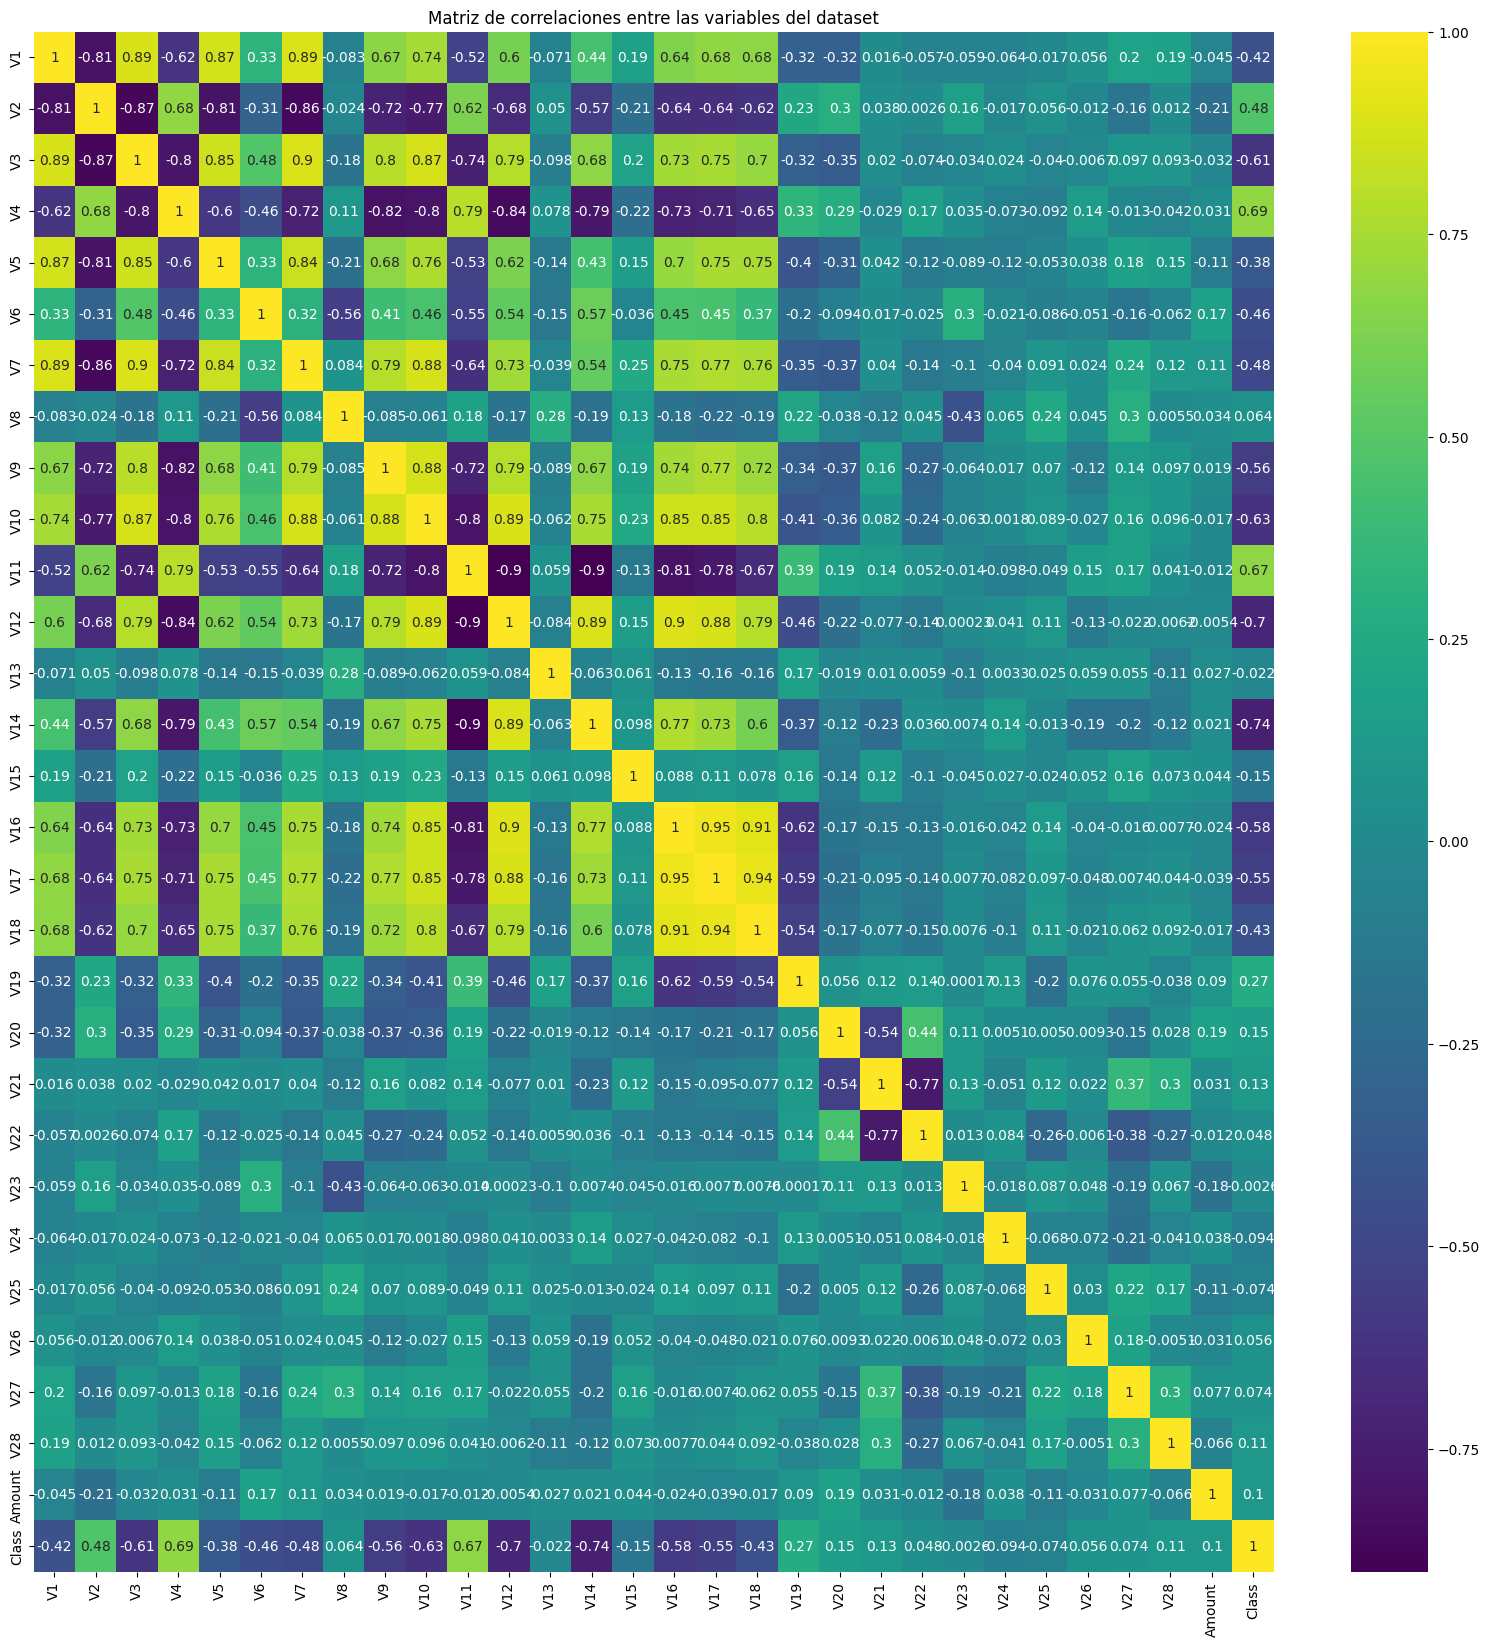

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt

# Método para gráficar una matriz de correlaciones como heatmap
plt.figure(figsize = (20,20))
plt.title('Matriz de correlaciones entre las variables del dataset', fontsize = 12)
sn.heatmap(dataset.corr(), cmap = 'viridis', annot = True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [11]:
x_train.shape

(776, 29)

In [12]:
x_test.shape

(195, 29)

## Modelo BernoulliNB

In [13]:
from sklearn.naive_bayes import BernoulliNB

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
modelo1=BernoulliNB()
modelo1.fit(x_train,y_train)

/home/xcx/leng/py/envpy/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [16]:
ypred=modelo1.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,ypred))

Accuracy:  0.8871794871794871


## Modelo de Árboles de decisión

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [18]:
modelo2 = DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [19]:
modelo2.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

[Text(0.5, 0.8333333333333334, 'V3 <= -0.531\ngini = 0.5\nsamples = 776\nvalue = [384, 392]\nclass = Fraude'),
 Text(0.25, 0.5, 'V12 <= -0.209\ngini = 0.101\nsamples = 376\nvalue = [20, 356]\nclass = Fraude'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.028\nsamples = 348\nvalue = [5, 343]\nclass = Fraude'),
 Text(0.375, 0.16666666666666666, 'gini = 0.497\nsamples = 28\nvalue = [15, 13]\nclass = Legal'),
 Text(0.75, 0.5, 'V12 <= -2.029\ngini = 0.164\nsamples = 400\nvalue = [364, 36]\nclass = Legal'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Fraude'),
 Text(0.875, 0.16666666666666666, 'gini = 0.141\nsamples = 394\nvalue = [364.0, 30.0]\nclass = Legal')]

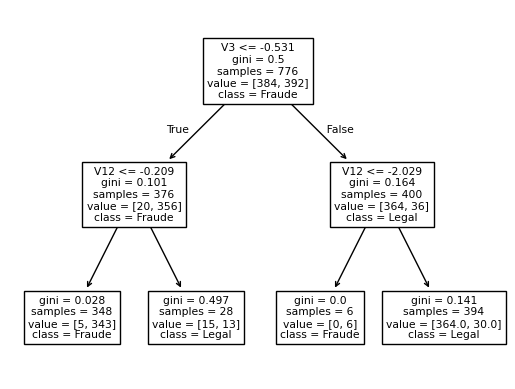

In [20]:
plot_tree(modelo2,feature_names=variables,class_names=["Legal","Fraude"])

In [21]:
ypred2=modelo2.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,ypred2))

Accuracy:  0.9230769230769231


## Modelo de regresión logística

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
modelo3=LogisticRegression()
modelo3.fit(x_train,y_train)

/home/xcx/leng/py/envpy/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xcx/leng/py/envpy/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
ypred3=modelo3.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,ypred3))

Accuracy:  0.9487179487179487


## Modelo de Redes neuronales

In [25]:
# para desactivar el uso de tarjetas GPU y que no salga el warning.
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [26]:
import tensorflow as tf

2024-12-16 22:43:58.017267: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 22:43:58.020628: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 22:43:58.032184: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734399838.054884  767758 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734399838.060404  767758 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-16 22:43:58.083327: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [27]:
from keras.layers import Input, Dense

In [28]:
from keras.models import Sequential
from keras import optimizers

In [29]:
modelo4=Sequential() # Crea un modelo secuencial, lo que significa que las capas se añaden en orden, una tras otra.
modelo4.add(Input(shape=(29,))) # indica que la entrada tiene 29 características (neuronas de entrada). Esto significa que el modelo espera vectores de tamaño 29 como entrada.
modelo4.add(Dense(64, activation='relu')) # Añade una capa oculta completamente conectada (Dense layer) con 64 neuronas
modelo4.add(Dense(32, activation='relu')) # Añade una capa oculta completamente conectada (Dense layer) con 32 neuronas
modelo4.add(Dense(1,activation="sigmoid")) # 1 neurona de salida, función sigmoid, que convierte la salida en un valor entre 0 y 1, osea una clasificación binaria.
modelo4.summary()

2024-12-16 22:44:00.044594: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 0 (0.00 B)

Prepara modelo para ser entrenado

In [30]:
modelo4.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

Entrena el modelo

In [31]:
print('Entrenando modelo...')
historial = modelo4.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1400, verbose=False)
print('Modelo entrenado.')

Entrenando modelo...
Modelo entrenado.


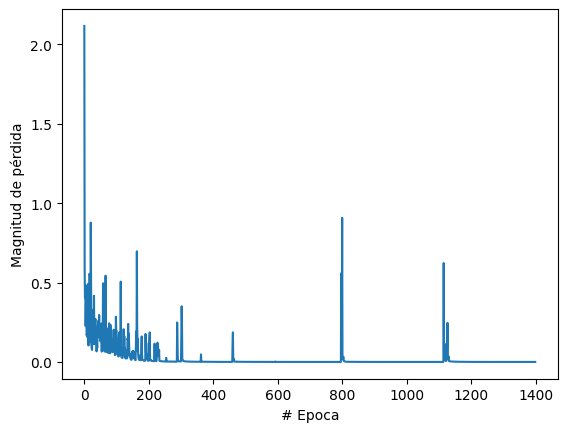

In [32]:
import matplotlib.pyplot as plt
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])

In [33]:
ypred4=modelo4.predict(x_test)
ypred4=ypred4[:]>=0.5

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [34]:
print("Accuracy: ",accuracy_score(y_test,ypred4))

Accuracy:  0.958974358974359


Guarda el modelo entrenado a disco

In [36]:
modelo4.save("modelo_neuronal.keras")

Carga el modelo entrenado del disco y lo deja en modelo 5

In [37]:
modelo5 = tf.keras.models.load_model('modelo_neuronal.keras')

In [45]:
modelo5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,101 (47.27 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,068 (31.52 KB)

In [38]:
ypred5=modelo5.predict(x_test)
ypred5=ypred5[:]>=0.5

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [39]:
print("Accuracy: ",accuracy_score(y_test,ypred5))

Accuracy:  0.958974358974359


Lo siguiente es para aplicar el modelo a cada fila del dataset

In [40]:
# Función para aplicar el modelo a una fila de un dataframe de pandas
def aplicar_modelo(fila):
    # Convertir la fila en un array (necesario si el modelo espera arrays de entrada)
    input_data = np.array(fila).reshape(1, -1)  # Reshape para asegurar que tiene la forma correcta
    resultado = modelo5.predict(input_data)  # Aplica el modelo
    #return resultado[0][0]  # Suponiendo que devuelve un array con un resultado
    return int(resultado[0][0] >= 0.5)  # Devuelve 0 o 1 según el umbral


In [41]:
# Lo siguiente es para simular tener un csv sin la columna Class
df_reducido = dataset.drop(columns=['Class'])

In [42]:
# Aplica el modelo a cada fila y crea una nueva columna con los resultados
df_reducido['resultado'] = df_reducido.apply(lambda fila: aplicar_modelo(fila), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

In [43]:
df_reducido.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,resultado
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Se guarda el csv a disco

In [44]:
df_reducido.to_csv('resultados.csv', index=False)